# Final Data Cleansing and Exploration

In [4]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading from CSV
athlete_events = "athlete_events.csv (1).zip"

athlete_data = pd.read_csv(athlete_events)

In [6]:
# Finding initial count of columns
athlete_data.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [7]:
# Finding column properties
athlete_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
# Finding counts of each Olympic season type
athlete_data["Season"].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [9]:
# Renaming NOC column to Counrty
athlete_data = athlete_data.rename({'NOC': 'Country'}, axis=1)

In [10]:
# Dropping NA's in selected columns
athlete_drop_yr= athlete_data.dropna(subset = ['Year'])
athlete_drop_medal = athlete_data.dropna(subset = ['Medal'])
athlete_drop_sex = athlete_data.dropna(subset = ['Sex'])
athlete_drop_age = athlete_data.dropna(subset = ['Age'])

In [11]:
# Creating dataframe to store medal data
medal_df = athlete_drop_medal

In [12]:
# Showing columns with equal count to medals
medal_df.count()

ID         39783
Name       39783
Sex        39783
Age        39051
Height     31072
Weight     30456
Team       39783
Country    39783
Games      39783
Year       39783
Season     39783
City       39783
Sport      39783
Event      39783
Medal      39783
dtype: int64

In [13]:
# Sorting data by year from 1896 to 2016
data_by_year= athlete_data.sort_values("Year")
data_by_year.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN


# Final Data Analysis and Plots

In [14]:
# Summer Olympic Data
data_summer = data_by_year[data_by_year.Season == "Summer"]
data_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [15]:
# Gender Count for Summer Games
gender_cnt_summer = data_summer.groupby(['Year','Sex']).size().reset_index(name='Count')
gender_cnt_summer.head()

,Year,Sex,Count
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285


## What was the number of male and female participants by year during the Summer Olympics from 1896 - 2016 and why did they differ?

## Historically there have been more male athletes than female, however by 2016 the gap has narrowed substantially. In analyzing male participation the following olympic games have noteable decreases, 1932, 1956 and 1980. The 1932 games were affected by the Great Depression. 1956 had boycott because the Soviet Union invaded Budapest and protest by Egypt, Lebanon and Iraq due of the Israeli invasion of the Sinai Peninsula. 1980 had the US boycott of the games being held in Russia, 65 other countries also boycotted these games, which created the largest boycott in Olympic history.

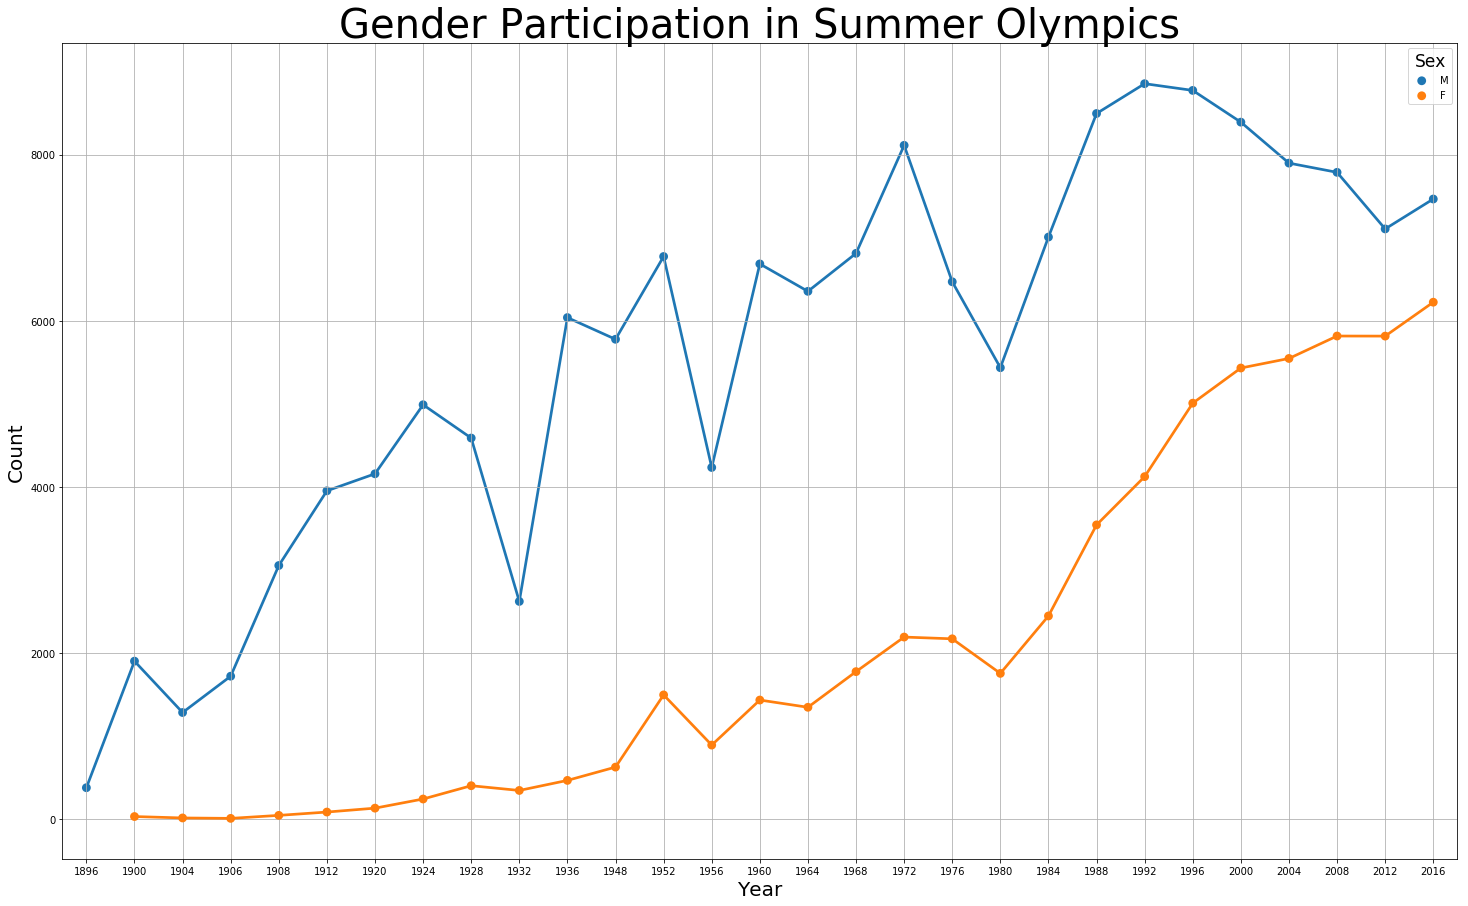

In [16]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Summer Olympics",fontsize=40)

sns.pointplot(x="Year", y="Count", hue="Sex", data=gender_cnt_summer, ax= ax_s)
plt.grid(True)
plt.savefig("Images_gender_summer.png")
plt.show()

In [17]:
# Winter Olympic Data
data_winter = data_by_year[data_by_year.Season == "Winter"]
data_winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
209810,105349,Jonas Elis Sandin,M,22.0,NaN,NaN,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
79825,40532,Jules Alexandre Girard-Bille,M,NaN,NaN,NaN,Switzerland,SUI,1924 Winter,1924,Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
165968,83350,"Duncan Brown ""Dunc"" Munro",M,23.0,173.0,86.0,Canada,CAN,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
147743,74134,George Herbert Leigh Mallory,M,37.0,NaN,NaN,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
212652,106776,Eduard Scherrer,M,33.0,NaN,NaN,Switzerland-1,SUI,1924 Winter,1924,Winter,Chamonix,Bobsleigh,Bobsleigh Men's Four/Five,Gold


In [18]:
#Gender Count for Winter Games
gender_cnt_winter = data_winter.groupby(['Year','Sex','Season']).size().reset_index(name='Count')
gender_cnt_winter.head()

,Year,Sex,Season,Count
0,1924,F,Winter,17
1,1924,M,Winter,443
2,1928,F,Winter,33
3,1928,M,Winter,549
4,1932,F,Winter,22


## What was the total number of male and female participants during the Winter Olympics across all Olympic games and how did they differ?

## Historically, there have been more male athletes during the Winter Olympics as well, however the disparity between male and female participants is less in the winter due to the volume of Winter Events compared to Summer Events.  In addition, world events affecting the Olympics were more prevelant closer to the Summer Games.

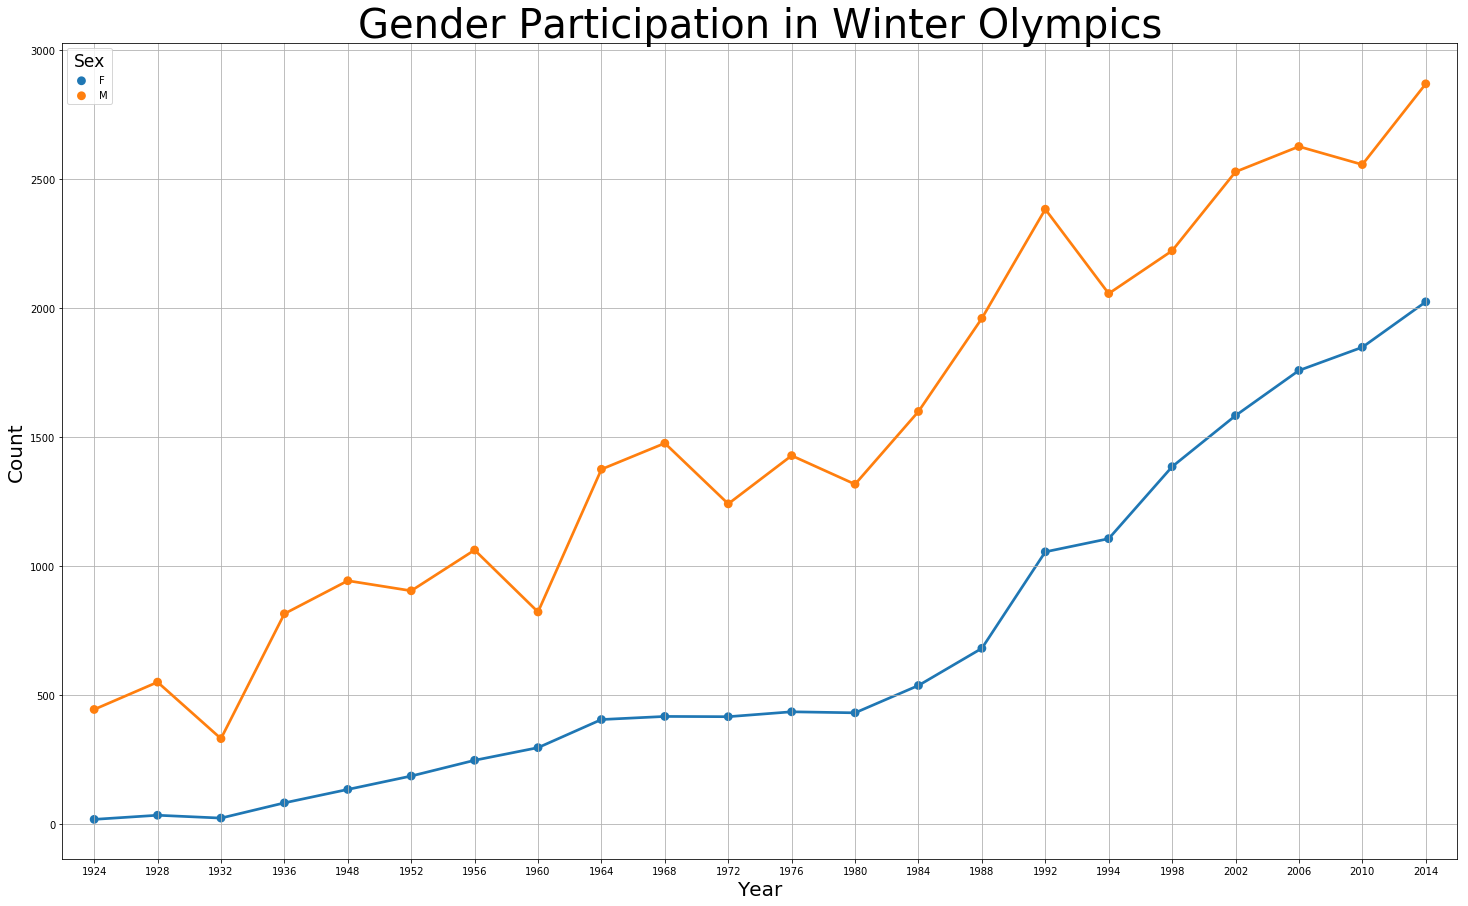

In [19]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Winter Olympics",fontsize=40)

sns.pointplot(x="Year", y="Count", hue="Sex", data=gender_cnt_winter, ax= ax_s)
plt.grid(True)
plt.savefig("Images_gender_winter.png")
plt.show()

## How many medals were distributed during each Olympic games?  How did the splitting of winter games to their own years affect these results?  Did World events have an impact?

## Our data shows games were affected by world events, specifically, both World Wars, which cancelled the 1918, 1940 and 1944 games.

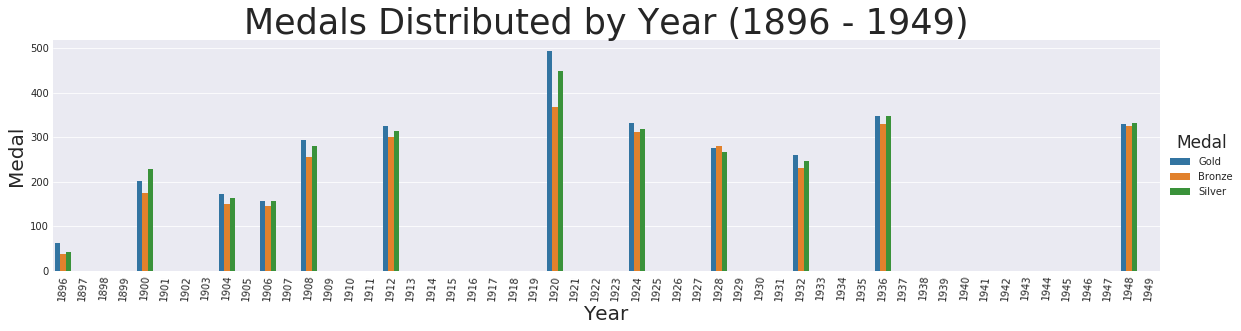

In [22]:
# Showing each Olympic Games with total medals for each medal category and any gaps(1896-1950)
with sns.axes_style('darkgrid'):
    g = sns.factorplot("Year", data= medal_df, aspect=4.0, kind='count',
                       hue='Medal', order=range(1896, 1950))
plt.xticks(rotation=85)
plt.title("Medals Distributed by Year (1896 - 1949)",fontsize=35)
plt.savefig("Images_medalcounts_year.png")
g.set_ylabels('Medal')

## We observed the Winter Games were split from taking place in the same year as the Summer games starting in 1994.  Since then, they have been every 4 years themsevles.

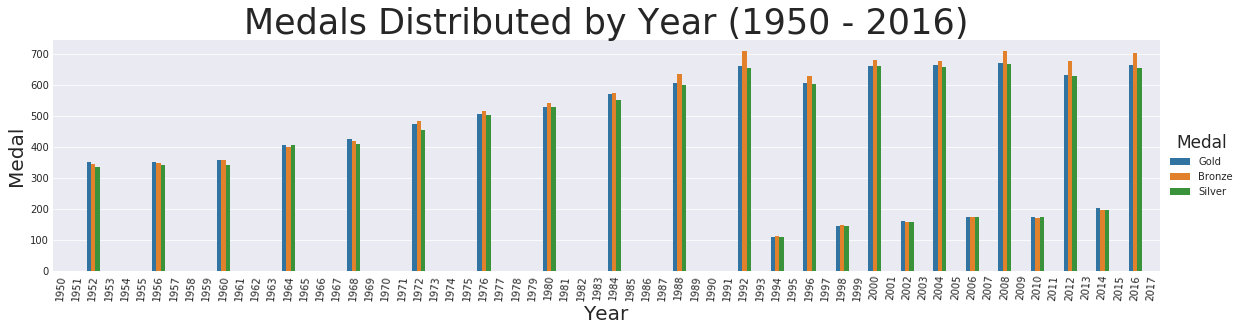

In [23]:
# Showing each Olympic Games with total medals for each medal category and any gaps(1950-2016)
with sns.axes_style('darkgrid'):
    g = sns.factorplot("Year", data= medal_df, aspect=4.0, kind='count',
                       hue='Medal', order=range(1950, 2018))
plt.xticks(rotation=85)
plt.title("Medals Distributed by Year (1950 - 2016)",fontsize=35)
plt.savefig("Images_medalcounts_year2.png")
g.set_ylabels('Medal')

## Which country has the most medal count in Gold, Silver and Bronze?

## We wanted to observe which country had collected the most medals in Olympic history and the data shows USA, USA, USA!

In [24]:
# Gold Medal Winners since 1896
gold_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Gold"]
# Silver Medal Winners since 1896
silver_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Silver"]
# Bronze Medal Winners since 1896
bronze_winners= athlete_drop_medal[athlete_drop_medal["Medal"]=="Bronze"]

In [25]:
# Save top 10 medal winners by country
g_w_a = gold_winners['Country'].value_counts().sort_values(ascending=True)[-10:]
s_w_a = silver_winners['Country'].value_counts().sort_values(ascending=True)[-10:]
b_w_a = bronze_winners['Country'].value_counts().sort_values(ascending=True)[-10:]

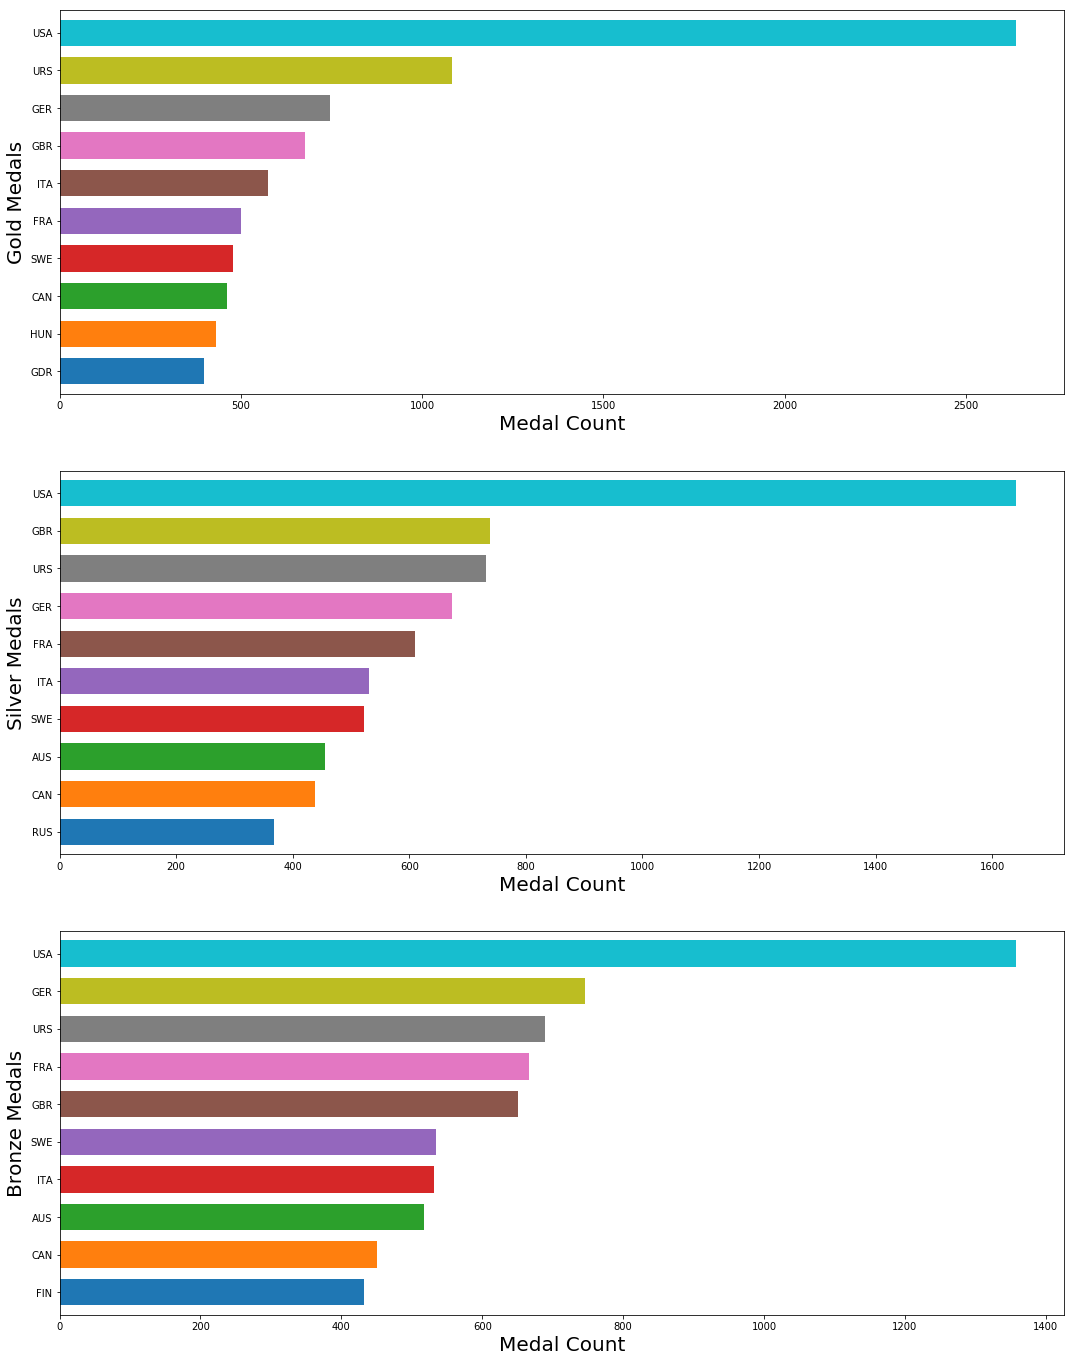

In [26]:
# Plotting with Horizontal View
plt.subplots(figsize=(18,24))
ax1 = plt.subplot(311)
g_w_a.plot.barh(width=.7)
ax2 = plt.subplot(312)
s_w_a.plot.barh(width=.7)
ax3 = plt.subplot(313)
b_w_a.plot.barh(width=.7)

ax_s.set_title("Medal Counts by Country", fontsize = 35)
ax1.set_xlabel('Medal Count')
ax2.set_xlabel('Medal Count')
ax3.set_xlabel('Medal Count')
ax1.set_ylabel('Gold Medals')
ax2.set_ylabel('Silver Medals')
ax3.set_ylabel('Bronze Medals')
plt.savefig("Images_medalcounts_country.png")
plt.show()

## What is the average age of all athletes?

## We wanted to see the average age of athletes including oldest and youngest and how they differed for each game.  We noticed that the average age seems to have hovered around 24 for the past 15 years.

## Oldest - John Quincy Ward...oldest Olympic participant (97)  Amsterdam Summer 1928 - Art Competitions  

## Youngest - Ethnikos Gymnastikos Syllogos 10 1896 games

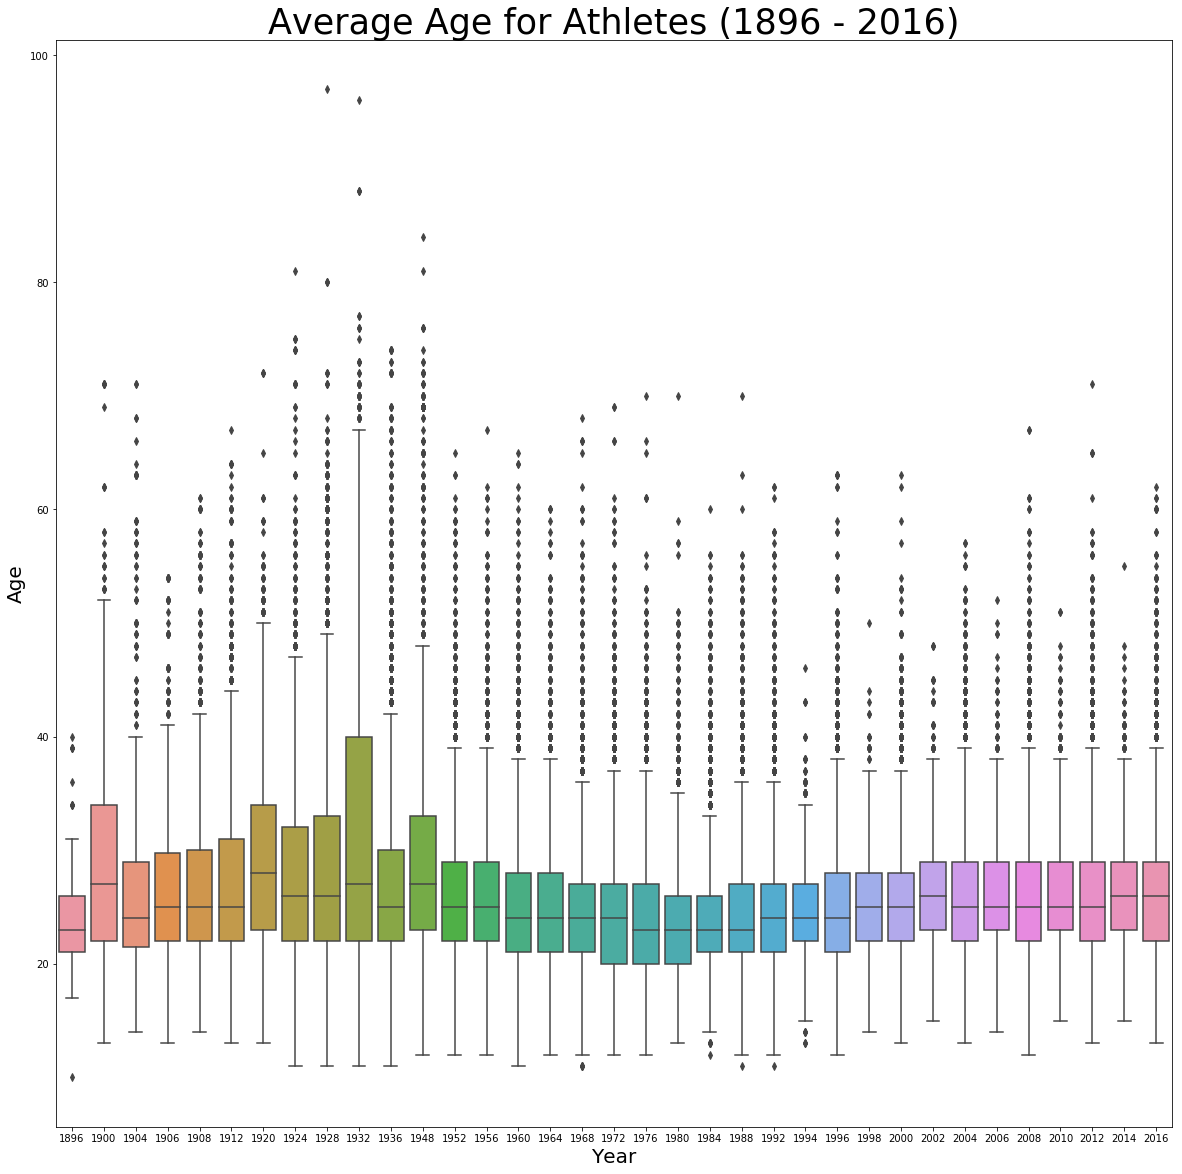

In [27]:
#Average Age Distribution of all athletes using BoxPlot
plt.figure(figsize=(20, 20))
sns.boxplot('Year', 'Age', data=athlete_data)
plt.title('Average Age for Athletes (1896 - 2016)', fontsize = 35)
plt.savefig("Images_avg_age_boxplot.png")


In [28]:
#Finding which sport has most medals by sport
top_medal_per_sport = athlete_data.groupby(['Country','Medal','Sport']).size().reset_index(name='Count')

In [29]:
sport_by_count= top_medal_per_sport.sort_values(["Count"], ascending=[False])

In [30]:
sport_by_count.head()

,Country,Medal,Sport,Count
3022,USA,Gold,Swimming,649
2991,USA,Gold,Athletics,542
3035,USA,Silver,Athletics,317
2993,USA,Gold,Basketball,281
3067,USA,Silver,Swimming,254


In [31]:
#Selecting two sports to observe top Gold Medal winners
data_gymnastics=athlete_drop_medal[athlete_drop_medal.Sport=='Gymnastics']
winners=athlete_drop_medal[athlete_drop_medal.Medal=='Gold']
#g_w_a = gold_winners['Country'].value_counts().sort_values(ascending=True)[-10:]

## Which Country has the most Gold Medals in an individual Summer Sport?

## We were curious to see which country had won the most gold medals in a random summer event.  We chose Gymnastics and found that Russia has historically dominated the gold medal count in gymnastics.  After the break up of the USSR, the medals won by other countries within the empire were inherited by Russia.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

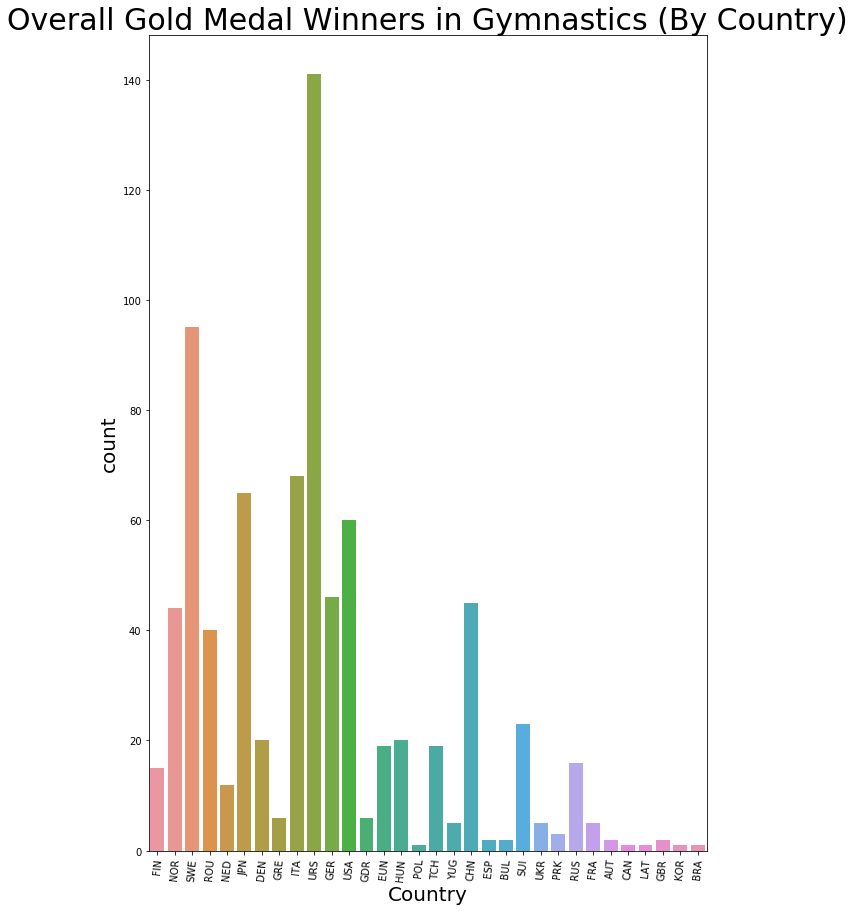

In [32]:
gymnastics_winners=winners[winners.Sport=='Gymnastics']
plt.figure(figsize=(10, 15))
sns.countplot(x="Country", data=gymnastics_winners)
plt.title('Overall Gold Medal Winners in Gymnastics (By Country)', fontsize = 30)
plt.savefig("Images_gymnastic_gold.png")
plt.xticks(rotation=85)


In [33]:
data_alpine_skiing=athlete_drop_medal[athlete_drop_medal.Sport=='Alpine Skiing']
winners=athlete_drop_medal[athlete_drop_medal.Medal=='Gold']

## Which Country has the most Gold Medals in an individual Winter Sport?

## We were curious to see which country had won the most gold medals in a random winter event. We chose Alpine Skiing and found that Austria has the most gold medals. Geographically, Austria is located in the heart of the Alps, so everyone skis!!

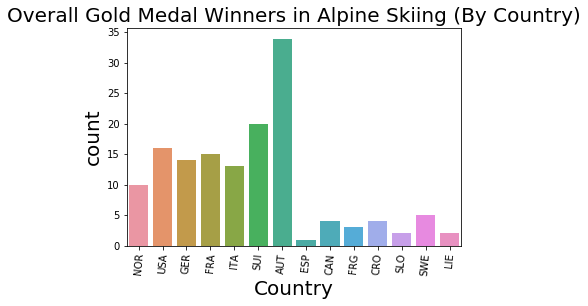

In [34]:
alpine_skiing_winners=winners[winners.Sport=='Alpine Skiing']
sns.countplot(x="Country", data=alpine_skiing_winners)
plt.xticks(rotation=85)
plt.title('Overall Gold Medal Winners in Alpine Skiing (By Country)', fontsize = 20)
plt.savefig("Images_swimming_gold.png")

## Which sport has given out the most gold medals over time?

## Track and Field has more events and can offer more gold medals.  Swimming also has many events and therefore more gold medals.  However, we found obsure events like Roque, Aeronautics, Basque Pelota.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

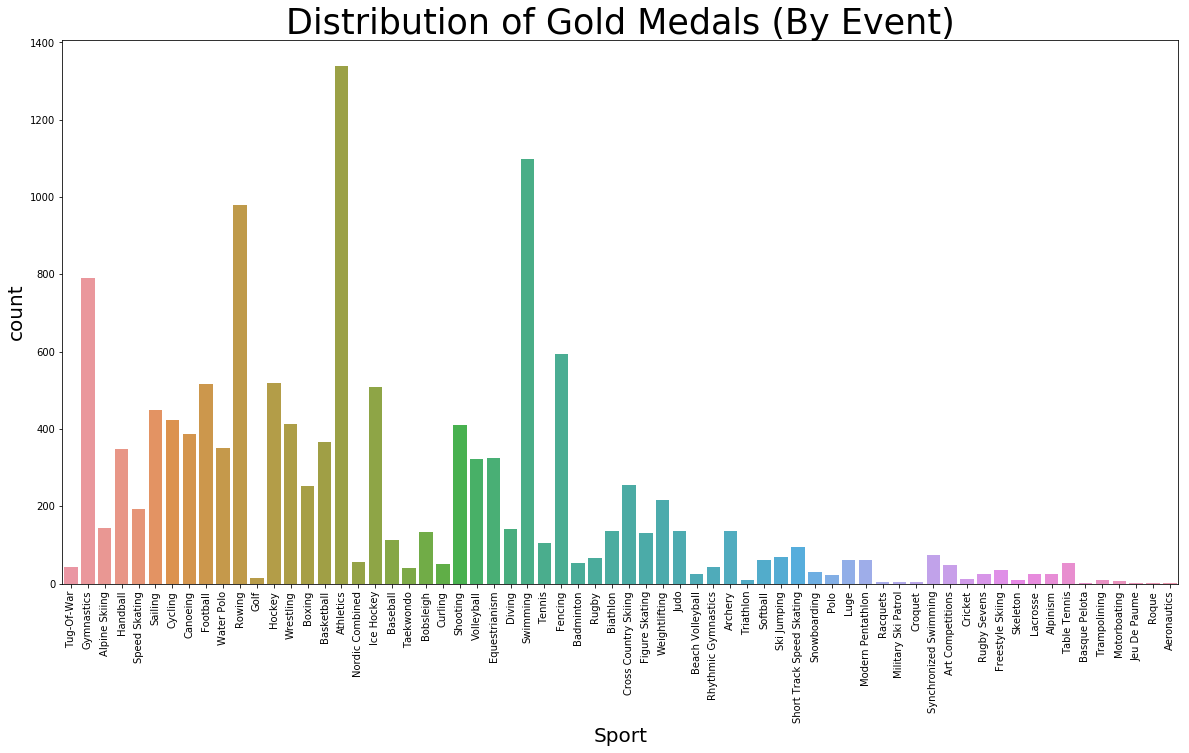

In [35]:
# evaluate gold medal distribution by event
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_winners["Sport"])
plt.title('Distribution of Gold Medals (By Event)', fontsize= 35)
plt.savefig("Images_gold_by_event.png")
plt.xticks(rotation=90)